In [110]:
from sys import maxsize
from itertools import permutations

In [171]:
def travellingSalesman(graph, source = 0):
    indicies = [i for i in range(len(graph)) if i != source]
    
    # stores optimal path length 
    minWeight = maxsize
    for i in permutations(indicies):
        weight = 0

        # measures path of "salesman" through an iteration
        position = source
        for j in i:
            weight += graph[position][j]
            position = j
        weight += graph[position][source]
 
        minWeight = min(minWeight, weight)         
    return minWeight

In [172]:
import networkx as nx
import matplotlib.pyplot as plt

In [173]:
def visualize(weights, randomSeed=0):
    graph = nx.Graph()
    for i in range(len(weights)):
        for j in range(i + 1, len(weights[i])):
            graph.add_edge(i, j, weight=weights[i][j])

    pos = nx.spring_layout(graph, seed=randomSeed)
    nx.draw_networkx_nodes(graph, pos, node_size=700)
    nx.draw_networkx_edges(graph, pos, width=6)
    nx.draw_networkx_labels(graph, pos, font_size=20, font_family="sans-serif")
    edge_labels = nx.get_edge_attributes(graph, "weight")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels)

    plt.axis("off")     # transparent background
    plt.show()

In [174]:
# distance between point i and j
weights = [[0, 20, 10, 12],
        [20, 0, 15, 11],
        [10, 15, 0, 17],
        [12, 11, 17, 0]]
# starting point index
source = 0

48


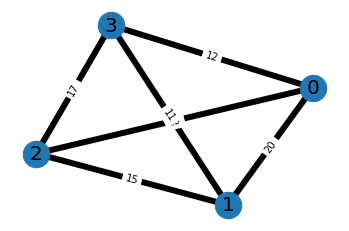

In [175]:
print(travellingSalesman(weights, source))
visualize(weights)